In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic_clean.csv')

In [3]:
df.sample(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
808,0,2,male,39.0,0,0,13.0000,S
558,1,1,female,39.0,1,1,79.6500,S
496,1,1,female,54.0,1,0,78.2667,C
606,0,3,male,30.0,0,0,7.8958,S


In [4]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

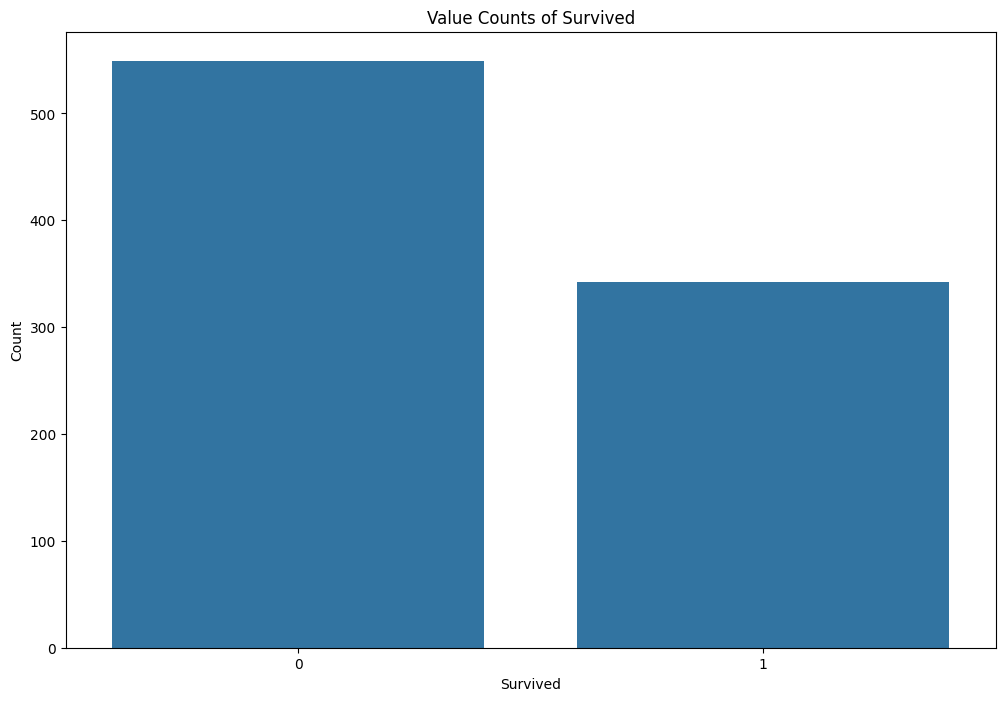

In [5]:
plt.figure(figsize=(12, 8))

sns.barplot(x = df['Survived'].value_counts().index, y = df['Survived'].value_counts())
plt.title('Value Counts of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

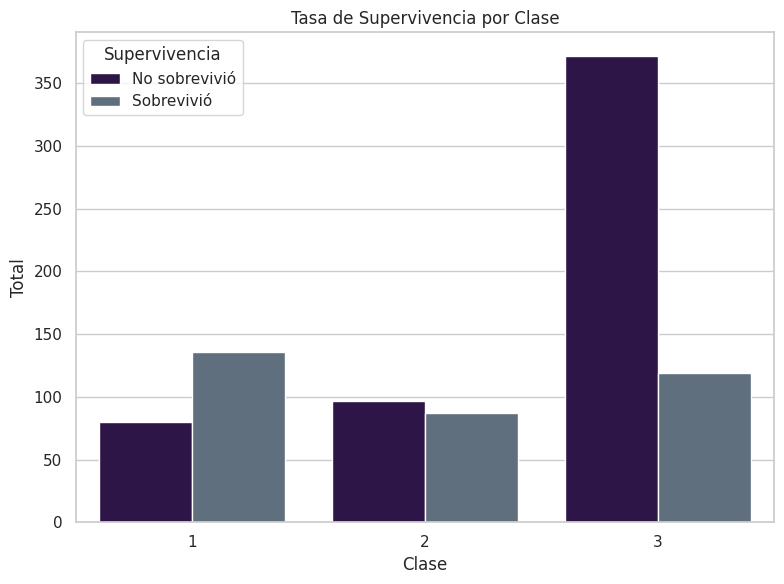

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Configurar estilo
sns.set(style="whitegrid")

# Crear la figura
plt.figure(figsize=(8, 6))

# Gráfica de conteo por clase y supervivencia
sns.countplot(
    data=df,
    x="Pclass",
    hue="Survived",
    palette=["#2c0e4f", "#5a6f82"]
)

# Etiquetas
plt.title("Tasa de Supervivencia por Clase")
plt.xlabel("Clase")
plt.ylabel("Total")

# Cambiar etiquetas de la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No sobrevivió", "Sobrevivió"], title="Supervivencia")

plt.tight_layout()
plt.show()


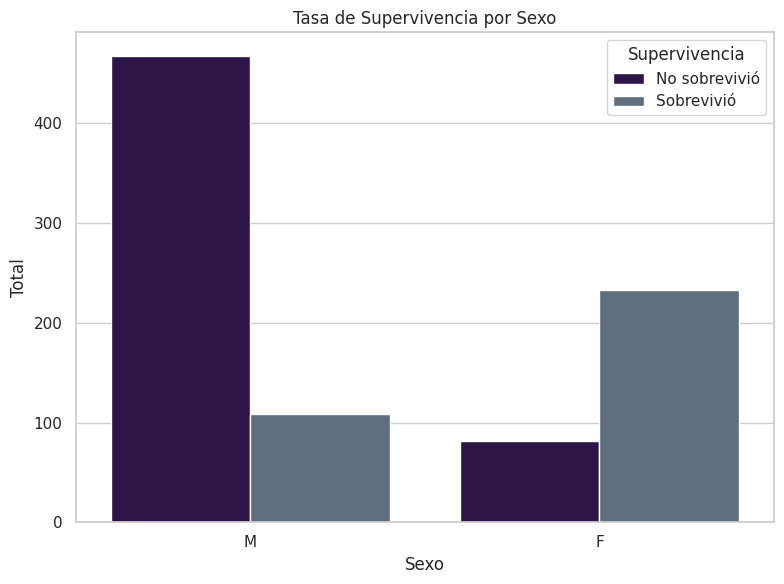

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Estilo
sns.set(style="whitegrid")

# Figura
plt.figure(figsize=(8, 6))

# Conteo por sexo y supervivencia
sns.countplot(
    data=df,
    x="Sex",
    hue="Survived",
    palette=["#2c0e4f", "#5a6f82"]
)

# Etiquetas
plt.title("Tasa de Supervivencia por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Total")

# Etiquetas personalizadas (si Sex está codificado como 0=M, 1=F)
plt.xticks([0, 1], ["M", "F"])

# Leyenda
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["No sobrevivió", "Sobrevivió"], title="Supervivencia")

plt.tight_layout()
plt.show()


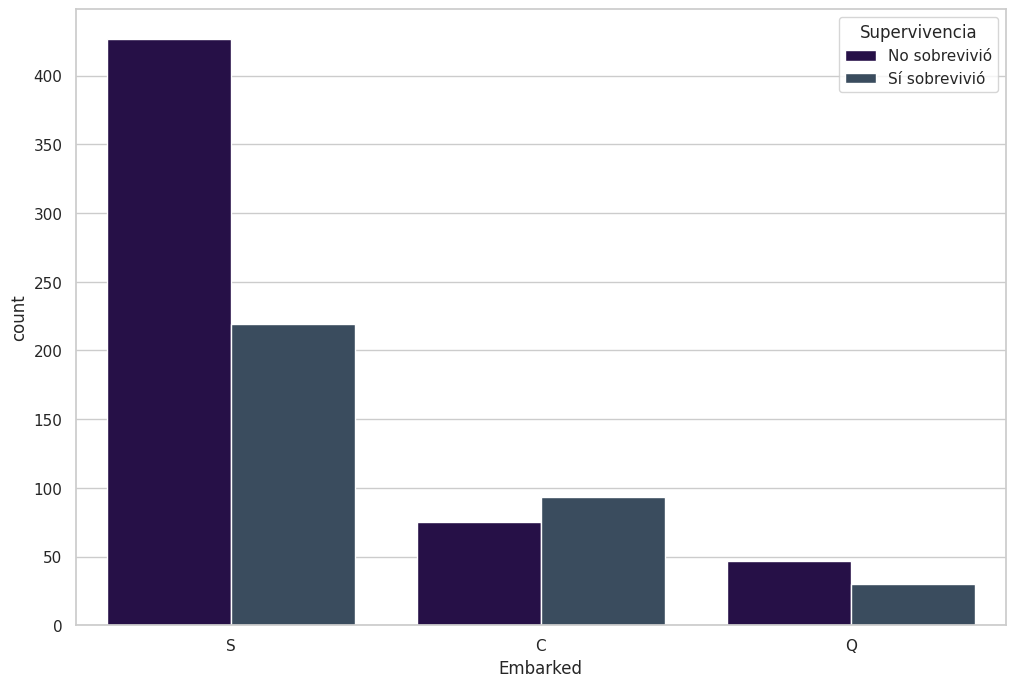

In [10]:
plt.figure(figsize = (12, 8))

# colores para cada una de las clases
color = ['#240750', '#344C64']

sns.countplot(df, x = 'Embarked', hue = 'Survived', palette=color) 
plt.legend(title = 'Supervivencia', labels = ['No sobrevivió', 'Sí sobrevivió'])
plt.show()

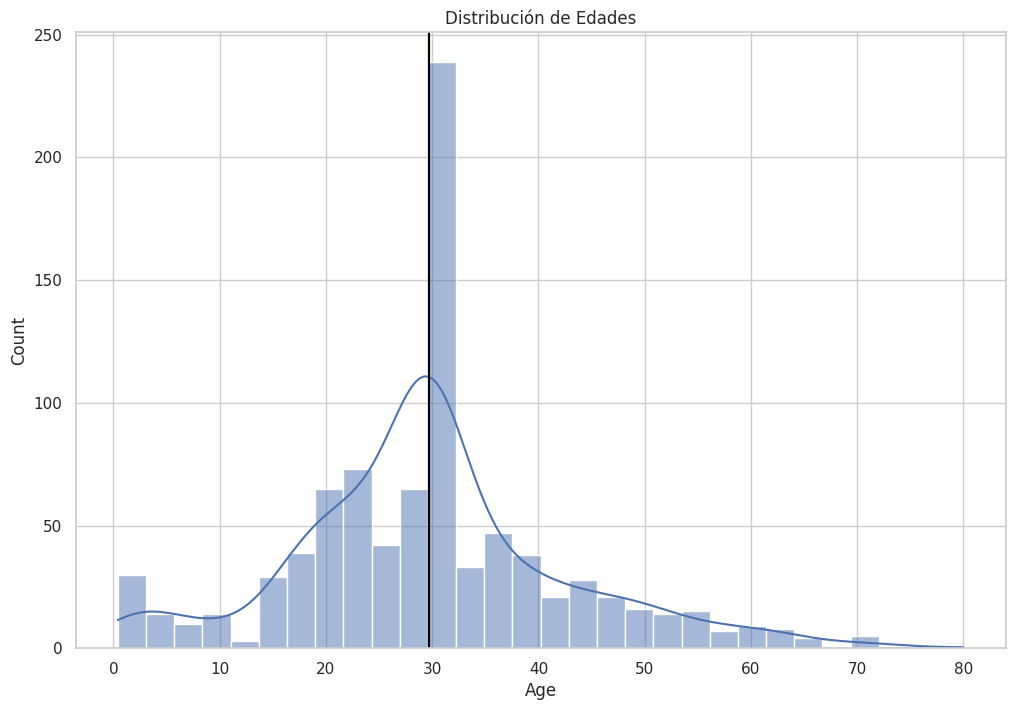

Media: 29.69911764705882
Mediana: 29.69911764705882
Moda: 29.69911764705882


In [11]:
plt.figure(figsize = (12, 8))

sns.histplot(df, x = 'Age', kde = True)
plt.title('Distribución de Edades')
plt.axvline(df['Age'].mean(), color = 'red')
plt.axvline(df['Age'].median(), color = 'green')
plt.axvline(df['Age'].mode()[0], color = 'black')
plt.show()

# Print the results
print(f"Media: {df['Age'].mean()}")
print(f"Mediana: {df['Age'].median()}")
print(f"Moda: {df['Age'].mode()[0]}")

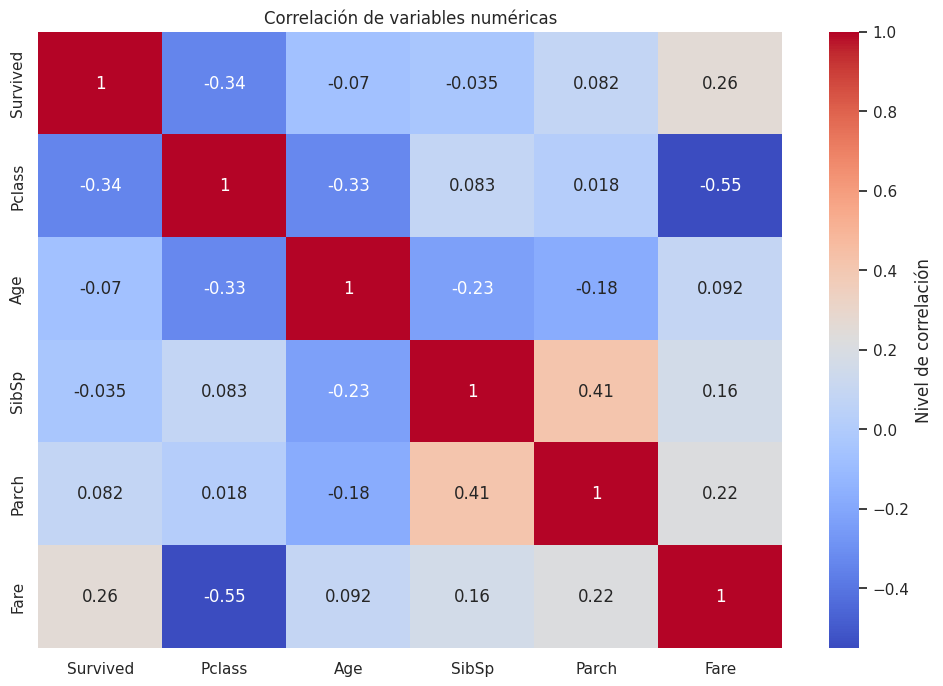

In [12]:
plt.figure(figsize = (12, 8))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), 
            annot=True, 
            cbar=True,  # Activar la barra de colores
            cmap='coolwarm',  # Cambiar la paleta de colores
            cbar_kws={'label': 'Nivel de correlación'})  # Etiqueta para la barra de colores
plt.title('Correlación de variables numéricas')
plt.show()

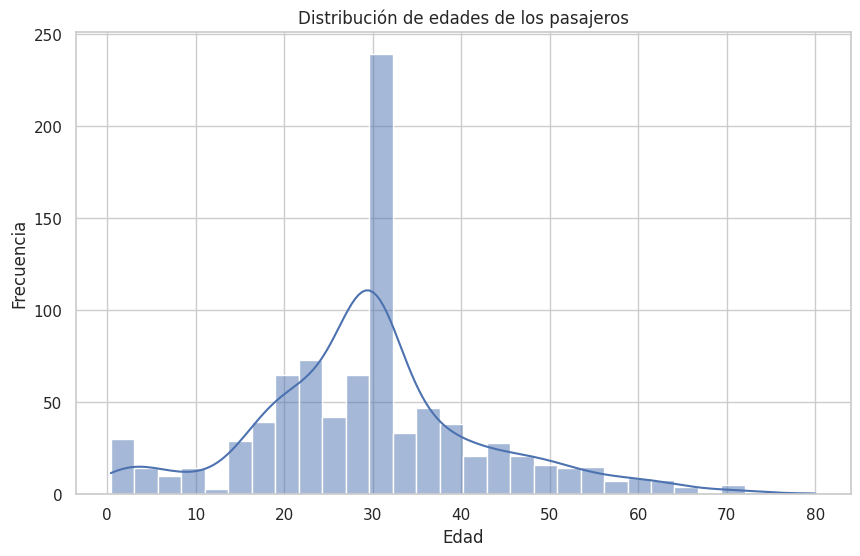

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Crear figura
plt.figure(figsize=(10, 6))

# Histograma con curva de densidad
sns.histplot(
    data=df,
    x="Age",
    bins=30,        # Número de intervalos
    kde=True        # Curva de densidad suavizada
)

# Etiquetas
plt.title("Distribución de edades de los pasajeros")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

plt.show()


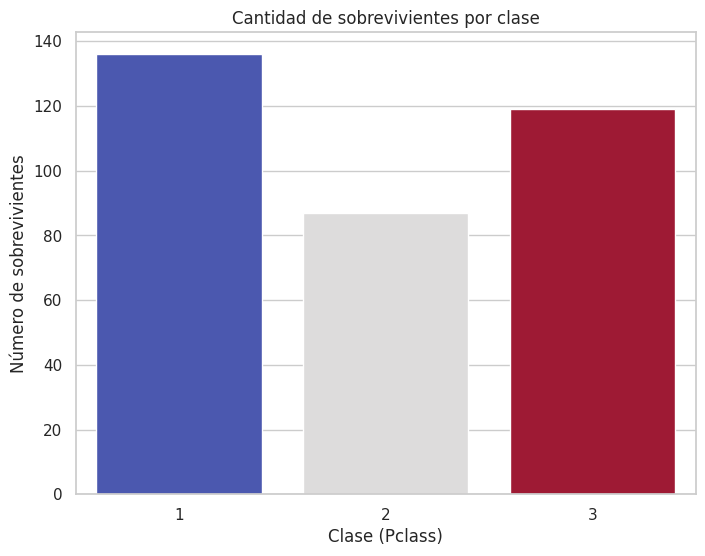

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/titanic_clean.csv")

# Filtrar sobrevivientes
survivors = df[df["Survived"] == 1]

plt.figure(figsize=(8, 6))

sns.countplot(
    data=survivors,
    x="Pclass",
    hue="Pclass",
    palette="coolwarm",
    legend=False
)

plt.title("Cantidad de sobrevivientes por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Número de sobrevivientes")

plt.show()


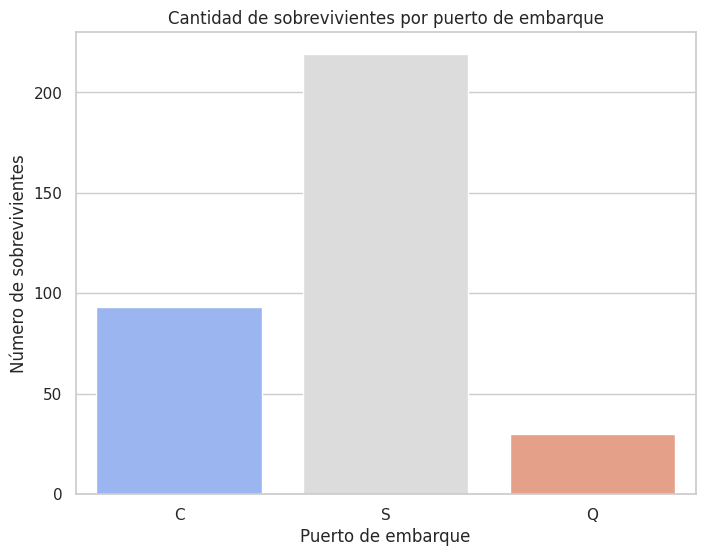

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Filtrar sobrevivientes
survivors = df[df["Survived"] == 1]

# Figura
plt.figure(figsize=(8, 6))

sns.countplot(
    data=survivors,
    x="Embarked",
    hue="Embarked",
    palette="coolwarm",
    legend=False
)

plt.title("Cantidad de sobrevivientes por puerto de embarque")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de sobrevivientes")

plt.show()


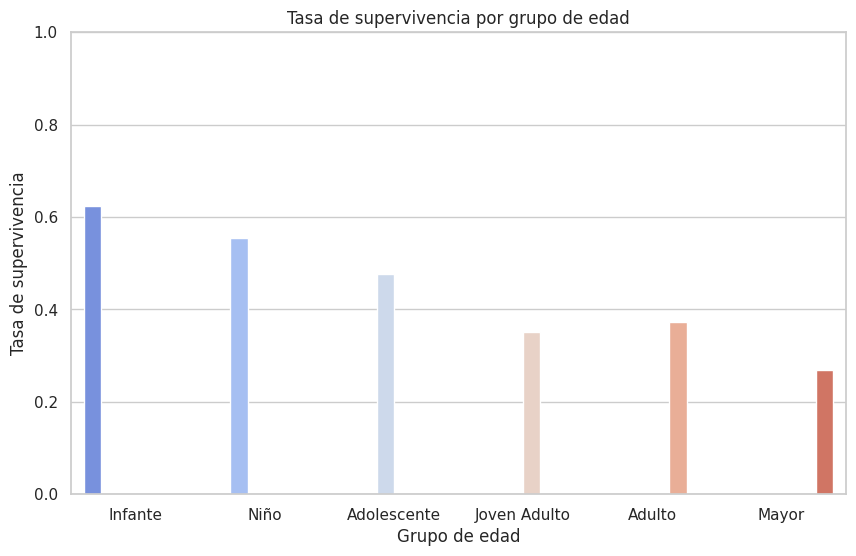

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Definir rangos y etiquetas
bins = [0, 2, 12, 17, 29, 59, 100]
labels = ["Infante", "Niño", "Adolescente", "Joven Adulto", "Adulto", "Mayor"]

# Crear nueva columna de grupos de edad
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Calcular tasa de supervivencia por grupo
survival_rate = df.groupby("AgeGroup")["Survived"].mean().reset_index()

# Figura
plt.figure(figsize=(10, 6))

sns.barplot(
    data=survival_rate,
    x="AgeGroup",
    y="Survived",
    palette="coolwarm",
    hue="AgeGroup",
    legend=False
)

plt.title("Tasa de supervivencia por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Tasa de supervivencia")

plt.ylim(0, 1)

plt.show()


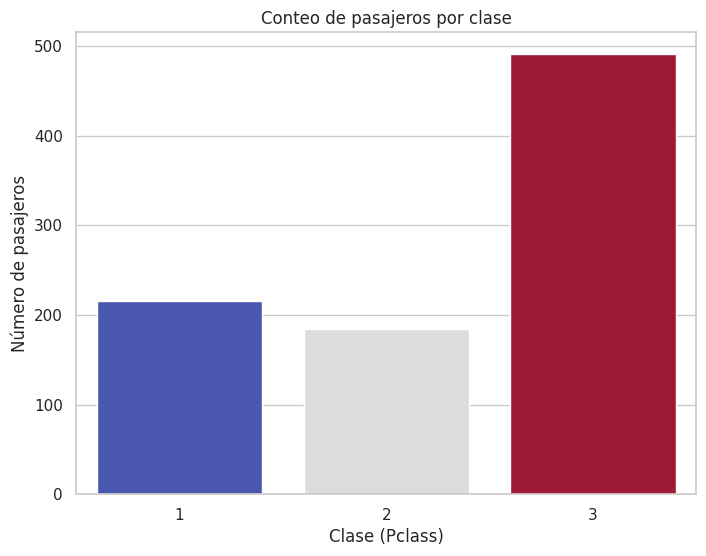

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x="Pclass",
    hue="Pclass",
    palette="coolwarm",
    legend=False
)

plt.title("Conteo de pasajeros por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Número de pasajeros")

plt.show()


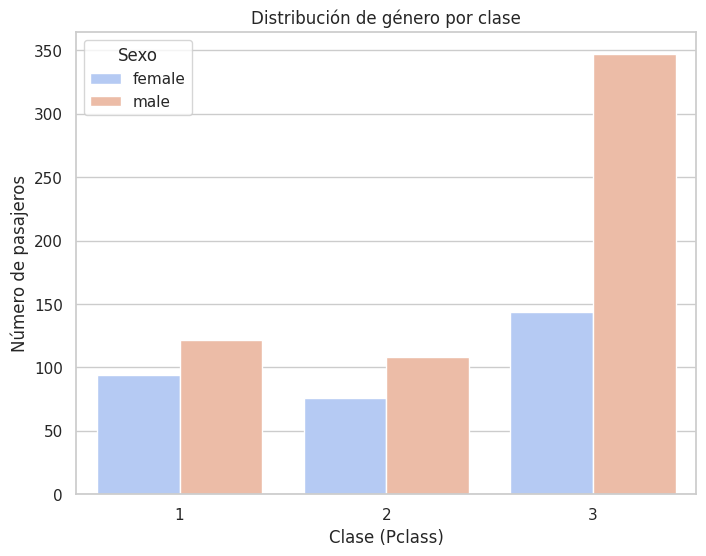

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x="Pclass",
    hue="Sex",
    palette="coolwarm"
)

plt.title("Distribución de género por clase")
plt.xlabel("Clase (Pclass)")
plt.ylabel("Número de pasajeros")

plt.legend(title="Sexo")

plt.show()


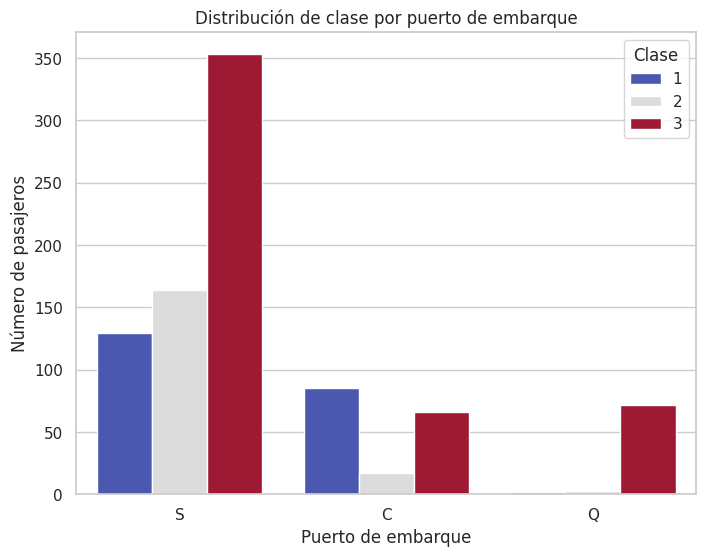

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x="Embarked",
    hue="Pclass",
    palette="coolwarm"
)

plt.title("Distribución de clase por puerto de embarque")
plt.xlabel("Puerto de embarque")
plt.ylabel("Número de pasajeros")

plt.legend(title="Clase")

plt.show()


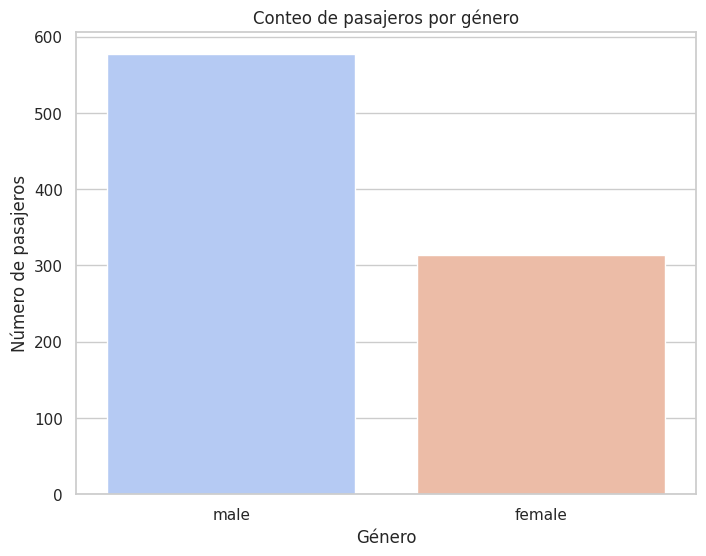

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x="Sex",
    hue="Sex",
    palette="coolwarm",
    legend=False
)

plt.title("Conteo de pasajeros por género")
plt.xlabel("Género")
plt.ylabel("Número de pasajeros")

plt.show()


In [22]:
import pandas as pd

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Calcular valores
edad_min = df["Age"].min()
edad_max = df["Age"].max()

print(f"Edad mínima: {edad_min}")
print(f"Edad máxima: {edad_max}")


Edad mínima: 0.42
Edad máxima: 80.0


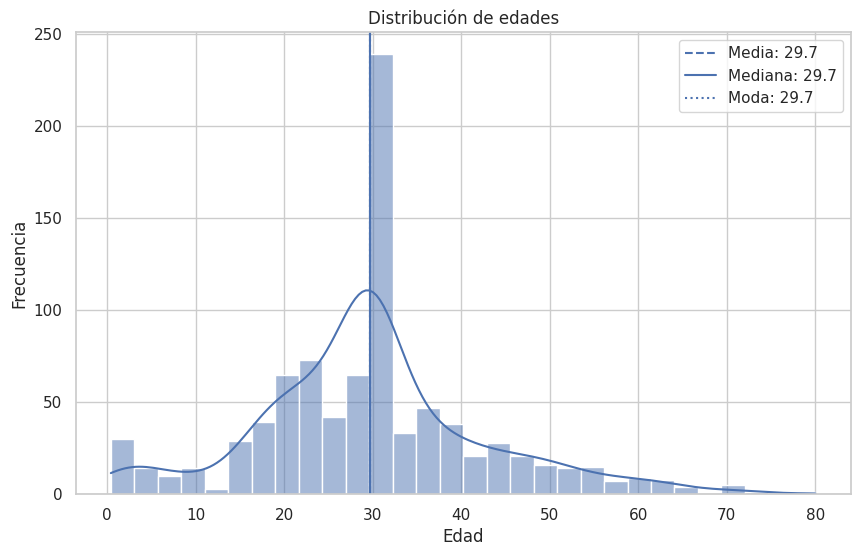

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Calcular estadísticas
mean_age = df["Age"].mean()
median_age = df["Age"].median()
mode_age = df["Age"].mode()[0]

# Figura
plt.figure(figsize=(10, 6))

# Histograma
sns.histplot(df["Age"], bins=30, kde=True)

# Líneas verticales
plt.axvline(mean_age, linestyle='--', label=f"Media: {mean_age:.1f}")
plt.axvline(median_age, linestyle='-', label=f"Mediana: {median_age:.1f}")
plt.axvline(mode_age, linestyle=':', label=f"Moda: {mode_age:.1f}")

plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()


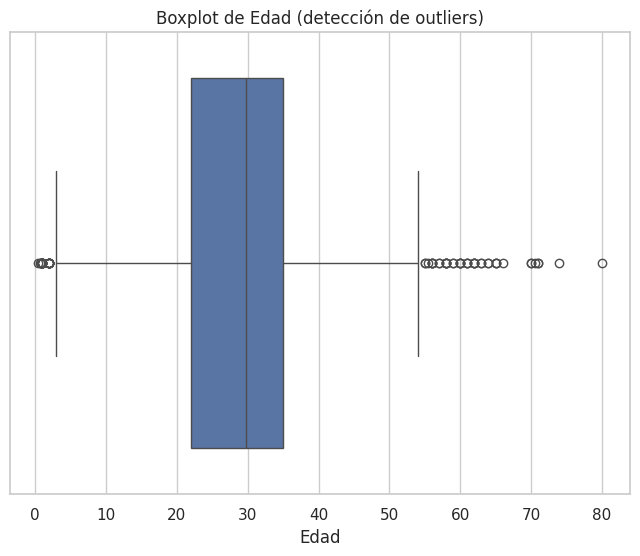

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.boxplot(
    x=df["Age"]
)

plt.title("Boxplot de Edad (detección de outliers)")
plt.xlabel("Edad")

plt.show()


In [25]:
import pandas as pd

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Calcular valores
fare_min = df["Fare"].min()
fare_max = df["Fare"].max()

print(f"Tarifa mínima: {fare_min}")
print(f"Tarifa máxima: {fare_max}")


Tarifa mínima: 0.0
Tarifa máxima: 512.3292


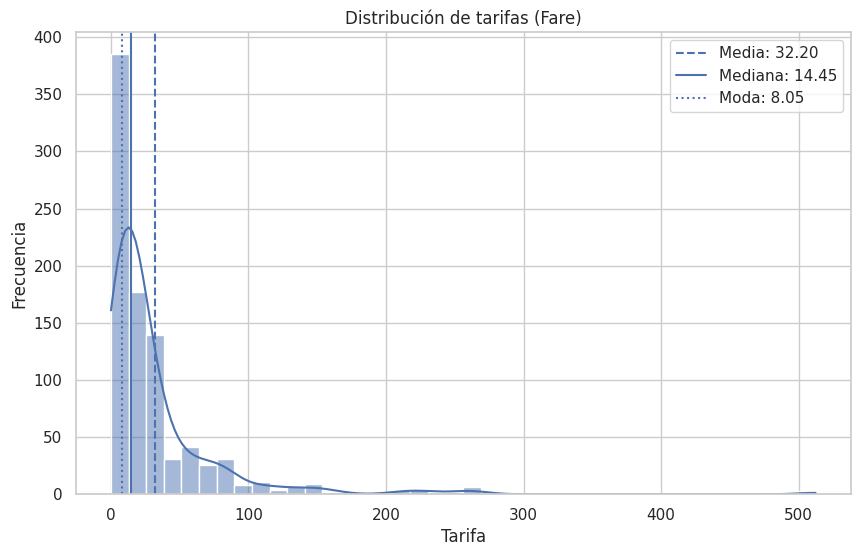

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Calcular estadísticas
mean_fare = df["Fare"].mean()
median_fare = df["Fare"].median()
mode_fare = df["Fare"].mode()[0]

# Figura
plt.figure(figsize=(10, 6))

# Histograma
sns.histplot(df["Fare"], bins=40, kde=True)

# Líneas verticales
plt.axvline(mean_fare, linestyle='--', label=f"Media: {mean_fare:.2f}")
plt.axvline(median_fare, linestyle='-', label=f"Mediana: {median_fare:.2f}")
plt.axvline(mode_fare, linestyle=':', label=f"Moda: {mode_fare:.2f}")

plt.title("Distribución de tarifas (Fare)")
plt.xlabel("Tarifa")
plt.ylabel("Frecuencia")
plt.legend()

plt.show()


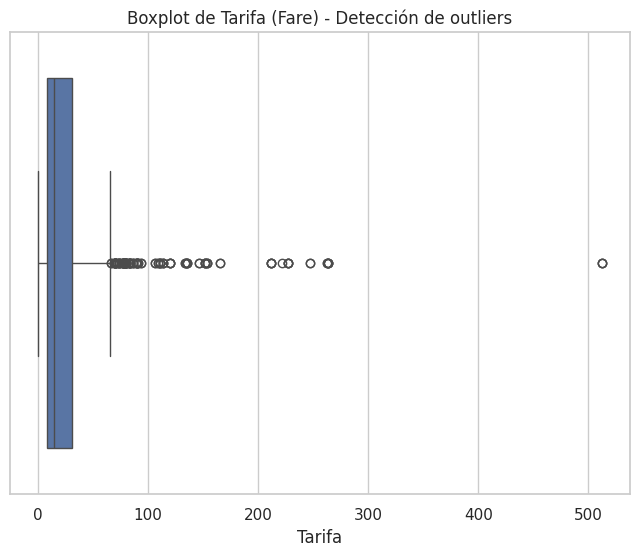

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.boxplot(
    x=df["Fare"]
)

plt.title("Boxplot de Tarifa (Fare) - Detección de outliers")
plt.xlabel("Tarifa")

plt.show()


In [28]:
import pandas as pd

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Filtrar pasajeros con tarifa 0
fare_zero = df[df["Fare"] == 0]

# Mostrar resultados
print(f"Cantidad de pasajeros con tarifa 0: {len(fare_zero)}")
print(fare_zero)


Cantidad de pasajeros con tarifa 0: 15
     Survived  Pclass   Sex        Age  SibSp  Parch  Fare Embarked
179         0       3  male  36.000000      0      0   0.0        S
263         0       1  male  40.000000      0      0   0.0        S
271         1       3  male  25.000000      0      0   0.0        S
277         0       2  male  29.699118      0      0   0.0        S
302         0       3  male  19.000000      0      0   0.0        S
413         0       2  male  29.699118      0      0   0.0        S
466         0       2  male  29.699118      0      0   0.0        S
481         0       2  male  29.699118      0      0   0.0        S
597         0       3  male  49.000000      0      0   0.0        S
633         0       1  male  29.699118      0      0   0.0        S
674         0       2  male  29.699118      0      0   0.0        S
732         0       2  male  29.699118      0      0   0.0        S
806         0       1  male  39.000000      0      0   0.0        S
815      

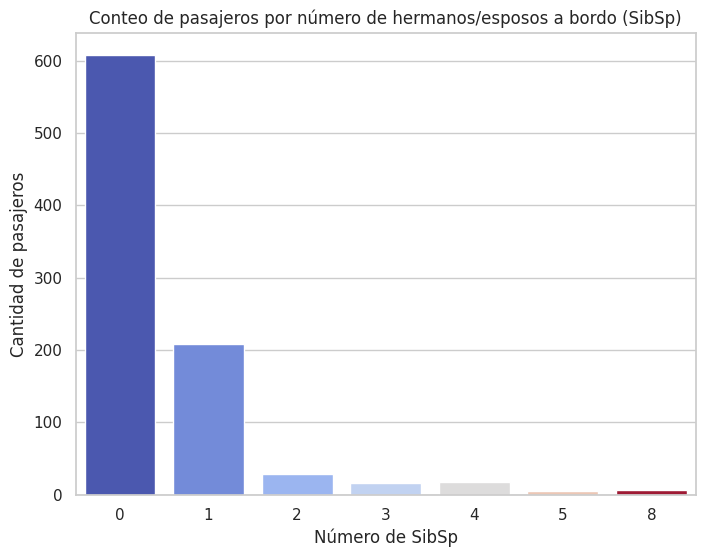

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Figura
plt.figure(figsize=(8, 6))

sns.countplot(
    data=df,
    x="SibSp",
    hue="SibSp",
    palette="coolwarm",
    legend=False
)

plt.title("Conteo de pasajeros por número de hermanos/esposos a bordo (SibSp)")
plt.xlabel("Número de SibSp")
plt.ylabel("Cantidad de pasajeros")

plt.show()


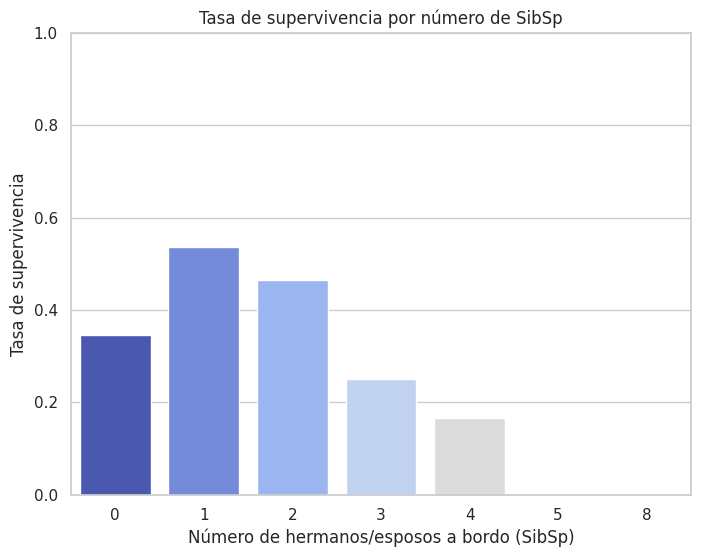

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Calcular tasa de supervivencia por SibSp
survival_sibsp = df.groupby("SibSp")["Survived"].mean().reset_index()

# Figura
plt.figure(figsize=(8, 6))

sns.barplot(
    data=survival_sibsp,
    x="SibSp",
    y="Survived",
    hue="SibSp",
    palette="coolwarm",
    legend=False
)

plt.title("Tasa de supervivencia por número de SibSp")
plt.xlabel("Número de hermanos/esposos a bordo (SibSp)")
plt.ylabel("Tasa de supervivencia")
plt.ylim(0, 1)

plt.show()


In [31]:
import pandas as pd

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Calcular porcentaje de supervivencia por SibSp
survival_percentage = (
    df.groupby("SibSp")["Survived"]
    .mean()
    .multiply(100)
    .round(2)
    .reset_index()
)

# Renombrar columna para claridad
survival_percentage.rename(columns={"Survived": "Survival_Percentage"}, inplace=True)

print(survival_percentage)


   SibSp  Survival_Percentage
0      0                34.54
1      1                53.59
2      2                46.43
3      3                25.00
4      4                16.67
5      5                 0.00
6      8                 0.00


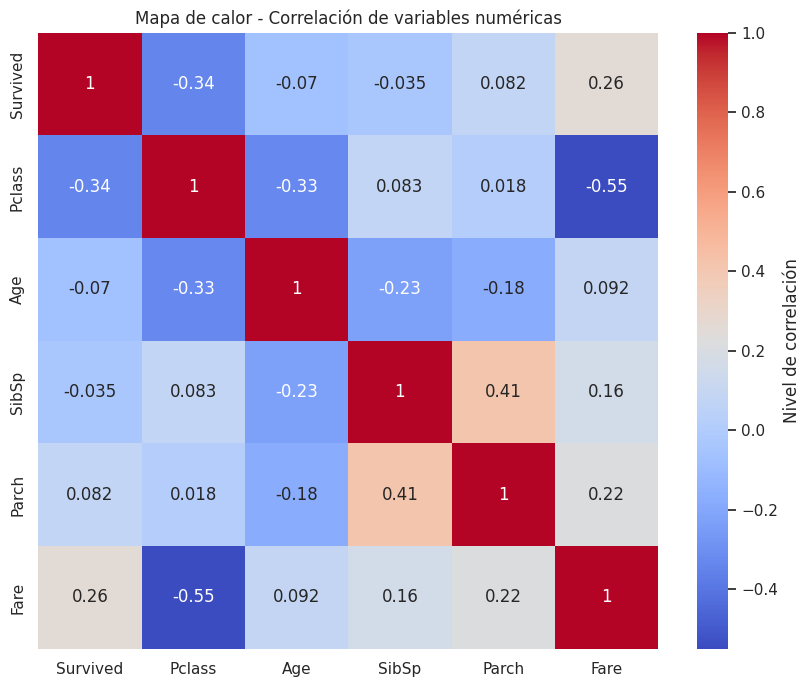

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("data/titanic_clean.csv")

# Seleccionar solo variables numéricas
numeric_cols = df.select_dtypes(include=["int64", "float64"])

# Calcular matriz de correlación
corr_matrix = numeric_cols.corr()

# Figura
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    cbar_kws={"label": "Nivel de correlación"}
)

plt.title("Mapa de calor - Correlación de variables numéricas")
plt.show()
